In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset=pd.read_csv('customer.csv', sep=";")

In [6]:
n=len(dataset)-1 #number of clients

In [7]:
n

9

In [8]:
Q=50 #vehicle capacity

In [9]:
N = [i for i in range(1, n+1)] #set of clients
V = [0] + N #clients+central depot

In [10]:
N

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
V

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
q={i: dataset.iloc[i]['DEMAND'] for i in N} #extraction of customers' demand
#q = {i: rnd.randint(1, 10) for i in N}

In [13]:
q

{1: 19.0, 2: 5.0, 3: 3.0, 4: 11.0, 5: 5.0, 6: 8.0, 7: 17.0, 8: 3.0, 9: 5.0}

In [14]:
K=range(1,3) #numer of vehicles range(1,4)--> 3 vehicles, range(1,3)--> 2 vehicles...

In [15]:
xc = dataset['XCOORD'].tolist() #extract locations
yc = dataset['YCOORD'].tolist()

In [16]:
xc

[42.352345,
 41.987654,
 43.123456,
 45.098765,
 40.876543,
 42.56789,
 44.210987,
 41.432109,
 43.890123,
 40.345678]

In [17]:
yc

[10.245678,
 12.098765,
 6.56789,
 15.432109,
 9.876543,
 7.890123,
 17.654321,
 13.210987,
 8.432109,
 11.123456]

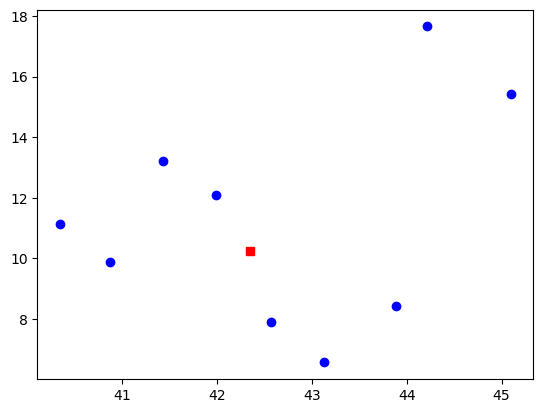

In [18]:
plt.plot(xc[0], yc[0], c='r', marker='s') # central depot location
plt.scatter(xc[1:], yc[1:], c='b') #clients location

In [19]:
# function to compute distances between nodes
from numpy import sin, cos, arccos, pi, round

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'kilometers'):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'kilometers':
        return round(distance * 1.609344, 2)

In [20]:
c = {(i, j): getDistanceBetweenPointsNew(xc[i], yc[i], xc[j], yc[j], 'kilometers') for i in V for j in V}
 #distance between nodes

In [21]:
c

{(0, 0): 0.0,
 (0, 1): 158.0,
 (0, 2): 312.31,
 (0, 3): 516.47,
 (0, 4): 166.94,
 (0, 5): 194.7,
 (0, 6): 634.03,
 (0, 7): 265.89,
 (0, 8): 225.6,
 (0, 9): 234.84,
 (1, 0): 158.0,
 (1, 1): 0.0,
 (1, 2): 470.18,
 (1, 3): 437.91,
 (1, 4): 222.66,
 (1, 5): 352.16,
 (1, 6): 514.18,
 (1, 7): 111.08,
 (1, 8): 365.77,
 (1, 9): 199.99,
 (2, 0): 312.31,
 (2, 1): 470.18,
 (2, 2): 0.0,
 (2, 3): 740.5,
 (2, 4): 370.3,
 (2, 5): 124.24,
 (2, 6): 899.14,
 (2, 7): 577.77,
 (2, 8): 172.82,
 (2, 9): 488.0,
 (3, 0): 516.47,
 (3, 1): 437.91,
 (3, 2): 740.5,
 (3, 3): 0.0,
 (3, 4): 651.28,
 (3, 5): 666.82,
 (3, 6): 201.58,
 (3, 7): 445.55,
 (3, 8): 571.02,
 (3, 9): 634.74,
 (4, 0): 166.94,
 (4, 1): 222.66,
 (4, 2): 370.3,
 (4, 3): 651.28,
 (4, 4): 0.0,
 (4, 5): 250.07,
 (4, 6): 736.71,
 (4, 7): 285.89,
 (4, 8): 355.44,
 (4, 9): 120.67,
 (5, 0): 194.7,
 (5, 1): 352.16,
 (5, 2): 124.24,
 (5, 3): 666.82,
 (5, 4): 250.07,
 (5, 5): 0.0,
 (5, 6): 809.3,
 (5, 7): 457.35,
 (5, 8): 153.43,
 (5, 9): 365.53,
 (6, 0): 

In [22]:
#pip install gurobipy

In [23]:
from gurobipy import Model, GRB, quicksum

In [24]:
A = [(i, j, k)  for k in K for i in V for j in V]
#Y = [(i, k) for i in V for k in K]
U = [(i, k) for k in K for i in N ]
# definition of variables domain

In [25]:
mdl = Model('CVRP')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-27


In [26]:
#decision variables definition
x = mdl.addVars(A, vtype=GRB.BINARY) #travelled arcs
#z = mdl.addVars(Y, vtype=GRB.BINARY) #assignment of vehicles
u = mdl.addVars(U, vtype=GRB.CONTINUOUS) #sub-tours avoidance

In [27]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j, k]*c[i, j] for i, j, k in A if i != j))


In [28]:
mdl.addConstrs(quicksum(x[i,j,k] for i in V)==quicksum(x[j,i,k] for i in V) for j in V for k in K) #Vehicle leaves node that it enters
mdl.addConstrs(quicksum(x[i,j,k] for k in K for i in V)==1 for j in N) #Ensure that every node is entered once
mdl.addConstrs(quicksum(x[0,j,k] for j in N)==1 for k in K) #Every vehicle leaves the depot
mdl.addConstrs(quicksum(q[j]*x[i,j,k] for i in V for j in N)<=Q for k in K) #Capacity constraint
mdl.addConstrs(x[i,i,k]==0 for i in V for k in K) #Arcs form i to i are not viable

mdl.addConstrs((u[j,k]-u[i,k])>=(q[j]-Q*(1-x[i,j,k])) for k in K for i in N for j in N if i!=j)
mdl.addConstrs(u[i,k]>=q[i] for i in N for k in K)
mdl.addConstrs(u[i,k]<=Q for i in N for k in K) #sub-tours elimination

#mdl.addConstrs(quicksum(x[j, i, k]*(c[j,i]/70) for j in V  for i in V if j!=i)<= 8 for k in K) Travel time constraint

{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (6, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 2): <gurobi.Constr *Awaiting Model Update*>,
 (7, 1): <gurobi.Constr *Awaiting Model Update*>,
 (7, 2): <gurobi.Constr *Awaiting Model Update*>,
 (8, 1): <gurobi.Constr *Awaiting Model Update*>,
 (8, 2): <gurobi.Constr *Awaiting Model Update*>,
 (9, 1): <gurobi.Constr *Awaiting Model Update*>,
 (9, 2): <gurobi.Constr *Awaiting Model Update*>}

In [29]:
#mdl.Params.MIPGap = 0.5
#mdl.Params.TimeLimit = 60  # optimisation duration in seconds
mdl.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 233 rows, 218 columns and 1226 nonzeros
Model fingerprint: 0xde15a0f1
Variable types: 18 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+02, 9e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 56 rows and 20 columns
Presolve time: 0.01s
Presolved: 177 rows, 198 columns, 2120 nonzeros
Variable types: 18 continuous, 180 integer (180 binary)

Root relaxation: objective 1.847450e+03, 56 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1847.45000    0   12          - 1847.45000      -     

In [30]:
active_arcs = [a for a in A if x[a].x > 0.99] #travelled arcs

In [31]:
active_arcs

[(0, 3, 1),
 (1, 0, 1),
 (3, 6, 1),
 (6, 7, 1),
 (7, 1, 1),
 (0, 9, 2),
 (2, 8, 2),
 (4, 5, 2),
 (5, 2, 2),
 (8, 0, 2),
 (9, 4, 2)]

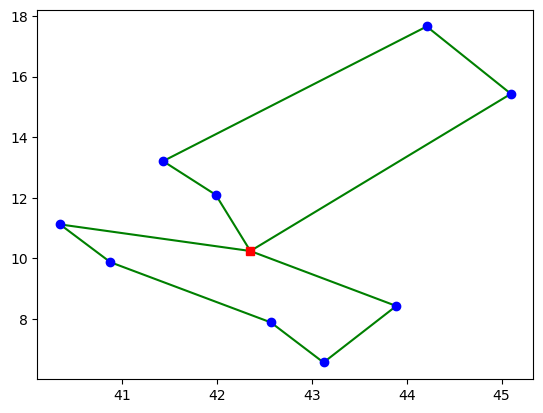

In [32]:
for i, j, k in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [33]:
#travel time
time1={k:quicksum(c[i,j]/50 for i,j, k in active_arcs if k==1) } #vehicle 1
time2={k:quicksum(c[i,j]/50 for i,j, k in active_arcs if k==2) } #vehicle 2


In [34]:
time1

{2: <gurobi.LinExpr: 29.2644>}

In [35]:
time2

{2: <gurobi.LinExpr: 22.564799999999998>}